# Snowplow Problem

## Problem Description

In this problem, a snowplow is tasked with clearing snow from the driveways of `n` houses positioned along a one-dimensional road. The snowplow starts at position `0`. The objective is to minimize the average waiting time for all houses, with travel time being equivalent to the distance the snowplow needs to cover. In the case where multiple houses are situated at the same position, the snowplow can clear all of their driveways without any additional travel time.


### Step 0 imports

Import the libraries

In [89]:
import numpy as np
import random
import matplotlib.pyplot as plt
import math

### Step 1 create the houses

In [90]:
def create_houses(n):
    houses = np.random.normal(0, 1000, n)
    houses = [(i, h) for i, h in enumerate(houses)]
    return houses


### Step 2 Create a way to have the average time

In [91]:
def calculate_average_wait_time(order, houses):
    snowplow_pos = 0
    total_wait_time = 0
    cumulative_time = 0
    for house_id in order:
        house_pos = next(h[1] for h in houses if h[0] == house_id)
        travel_time = abs(snowplow_pos - house_pos)
        cumulative_time += travel_time
        total_wait_time += cumulative_time
        snowplow_pos = house_pos
    avg_wait_time = total_wait_time / len(order)
    return avg_wait_time


### Step 3 Let's code the polynomial algorithm

The time complexity of the below solution is polynomial. The division of houses into left and right sides can be done in linear time, $O(n)$. Sorting each list of houses on the left and right sides takes $O(n \log n)$ time each. Therefore, the total time complexity is $O(n) + 2 \times O(n \log n) = O(n \log n)$, which is polynomial.

In [92]:
def parcours(house_positions):
    left_side = []
    right_side = []
    snowplow_pos = 0
    for i, h in enumerate(house_positions):
        if h < snowplow_pos:
            left_side.append((i, h))
        else:
            right_side.append((i, h))
    left_side.sort(key=lambda x: x[1], reverse=True)
    right_side.sort(key=lambda x: x[1])
    if abs(left_side[0][1]) < abs(right_side[0][1]):
        order = left_side + right_side
    else:
        order = right_side + left_side
    return [h[1] for h in order], [h[0] for h in order]


#### The greedy solution

The time complexity of the `greedy_solution` algorithm is $O(n^2)$, while the time complexity of the `polynomial algorithm` algorithm is $O(n \log n)$. Therefore, the `polynomial algorithm` algorithm has a lower time complexity than the `greedy_solution` algorithm, meaning that it is more efficient for large values of $n$. This is because the growth rate of $O(n \log n)$ is lower than the growth rate of $O(n^2)$.

In [93]:
def greedy_solution(houses):
    snowplow_pos = 0
    order = []
    remaining_houses = houses.copy()
    while remaining_houses:
        closest_house = min(remaining_houses, key=lambda h: abs(snowplow_pos - h[1]))
        order.append(closest_house[0])
        snowplow_pos = closest_house[1]
        remaining_houses.remove(closest_house)
    return order


### Step 4 compare the algorithm

For theses tests `n=100` and we run over 1000 iterations to avoid the randomness

In [94]:
import time

def get_average_time(n, iterations, window_size, parcours_times, greedy_times):
    parcours_time_taken = 0
    greedy_time_taken = 0

    for _ in range(iterations):
        # Create houses
        houses = create_houses(n)

        # Calculate the average wait time an processing time for both algorithms
        start_time = time.time()
        _, parcours_order = parcours([h[1] for h in houses])
        end_time = time.time()
        parcours_time_taken += end_time - start_time
        parcours_time = calculate_average_wait_time(parcours_order, houses)

        start_time = time.time()
        greedy_order = greedy_solution(houses)
        end_time = time.time()
        greedy_time_taken += end_time - start_time
        greedy_time = calculate_average_wait_time(greedy_order, houses)

        parcours_times.append(parcours_time)
        greedy_times.append(greedy_time)

    # Calculate the average times over a window for a better ploting
    parcours_avg = [sum(parcours_times[i:i + window_size]) / window_size for i in range(0, len(parcours_times), window_size)]
    greedy_avg = [sum(greedy_times[i:i + window_size]) / window_size for i in range(0, len(greedy_times), window_size)]

    return parcours_avg, greedy_avg, parcours_time_taken / iterations, greedy_time_taken / iterations


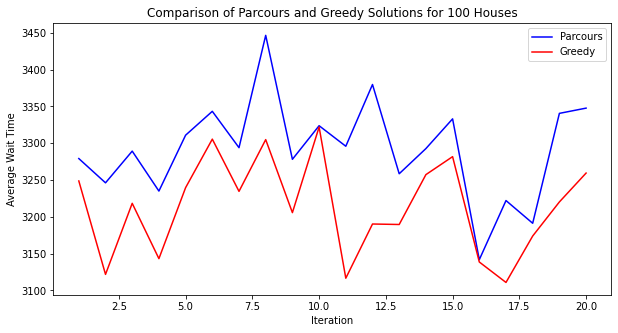

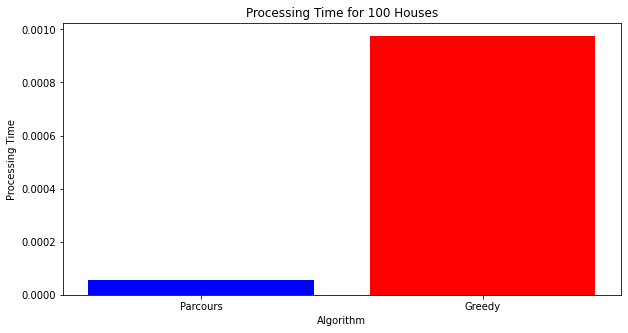

Average Parcours Time for 1 iteration: 3292.514680433036
Average Greedy Time for 1 iteration: 3214.0977119320382

Parcours Processing Time: 5.5907487869262694e-05
Greedy Processing Time: 0.0009752418994903564


In [95]:
def compare_algorithms(n, iterations=100, window_size=50):
    parcours_times = []
    greedy_times = []
    
    parcours_avg, greedy_avg, parcours_ptime, greedy_ptime = get_average_time(n, iterations, window_size, parcours_times, greedy_times)

    # Plot the average times
    x = range(1, len(parcours_avg) + 1)
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.plot(x, parcours_avg, label='Parcours', color='blue')
    ax.plot(x, greedy_avg, label='Greedy', color='red')
    ax.set_xlabel('Iteration')
    ax.set_ylabel('Average Wait Time')
    ax.legend()
    plt.title(f'Comparison of Parcours and Greedy Solutions for {n} Houses')
    plt.show()

    # Plot the processing times
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.bar(['Parcours', 'Greedy'], [parcours_ptime, greedy_ptime], color=['blue', 'red'])
    ax.set_xlabel('Algorithm')
    ax.set_ylabel('Processing Time')
    plt.title(f'Processing Time for {n} Houses')
    plt.show()

    # Print the average times
    print(f'Average Parcours Time for 1 iteration: {sum(parcours_times) / len(parcours_times)}')
    print(f'Average Greedy Time for 1 iteration: {sum(greedy_times) / len(greedy_times)}', end='\n\n')

    # Print the processing times
    print(f'Parcours Processing Time: {parcours_ptime}')
    print(f'Greedy Processing Time: {greedy_ptime}')


compare_algorithms(100, 1000)


## Conclusion

In conclusion, the `parcours` algorithm provides an efficient solution to the snowplow problem, optimizing the average waiting time for the houses while ensuring the snowplow travels in the most effective route possible. By dividing the houses based on their positions relative to the snowplow's starting point and sorting them accordingly, we are able to determine the optimal path for the snowplow, resulting in a streamlined and effective solution to minimize the average waiting time for all houses.